# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [2]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [3]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [6]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 60000, random_state=42)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

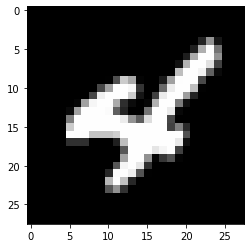

In [7]:
plt.imshow(X_train[30,:].reshape(28,28),cmap='gray')

In [8]:
y_train[30]

'4'

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [14]:
#With Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
gnb.fit(X_train,y_train)

predicted = gnb.predict(X_train)
accuracy_score(y_train, predicted)

0.5571666666666667

In [15]:
confusion_matrix(y_train, predicted)

array([[5319,    9,   32,   20,    9,   13,  187,    2,  209,  120],
       [   2, 6327,   15,   28,    3,   12,   83,    2,  169,   84],
       [ 498,  149, 1913,  373,   19,   29, 1549,   20, 1365,  108],
       [ 363,  292,   56, 2186,    8,   14,  340,   47, 2093,  708],
       [ 162,   35,   49,   35,  821,   46,  601,   32, 1220, 2917],
       [ 635,  131,   31,  121,   21,  262,  312,   11, 3243,  609],
       [  49,   90,   30,    2,    4,   23, 5592,    0,  118,    7],
       [  25,   41,   10,   53,   42,    8,   21, 1803,  190, 4045],
       [  93,  719,   32,   45,   14,   34,  103,    9, 3583, 1224],
       [  34,   33,   14,   10,   27,    6,    4,   76,   94, 5624]])

In [12]:
#With Simple linear model
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


sgd = SGDClassifier(loss='log')
sgd.fit(X_train, y_train)

sgd_predicted = sgd.predict(X_train)
accuracy_score(y_train, predicted)

0.8988166666666667

In [16]:
confusion_matrix(y_train, sgd_predicted)

array([[5801,    1,    3,   17,    1,   27,   10,    2,   45,   13],
       [   1, 6564,   23,   12,    3,   34,    7,   10,   42,   29],
       [  52,   76, 5162,  144,   38,   60,   55,   61,  341,   34],
       [  30,   22,  128, 5101,    4,  308,    7,   40,  263,  204],
       [  18,   20,   31,   23, 5037,   59,   35,   41,  108,  546],
       [  61,   34,   28,  161,   12, 4775,   52,   14,  178,   61],
       [  58,   16,   48,   12,   16,  219, 5457,    1,   76,   12],
       [  22,   19,   45,   40,   40,   37,    6, 5761,   41,  227],
       [  61,  122,   43,   73,   14,  309,   17,   27, 4925,  265],
       [  29,   23,   25,   40,   76,  101,    1,  210,   71, 5346]])

In [17]:
#With Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

clf_predicted = clf.predict(X_train)
accuracy_score(y_train, clf_predicted)

1.0

In [18]:
confusion_matrix(y_train, clf_predicted)

array([[5920,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6725,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6023,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6107,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5918,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5376,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5915,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6238,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5856,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5922]])

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [41]:
from sklearn.metrics import f1_score, roc_curve, plot_roc_curve,svm

In [68]:
#Compute test for Naive Bays

predicted = gnb.predict(X_test)

print("Naive Bays classification")
print("Accuracy of Naive Bays = ",accuracy_score(y_test, predicted))
print("F-Measure =",f1_score(y_test, predicted, average='micro'))

model_score = gnb.predict_proba(X_test)[:,5]
fpr_Naive, tpr_Naive, thresholds_Naive = roc_curve(y_test, model_score,pos_label='5')

Naive Bays classification
Accuracy of Naive Bays =  0.5604
F-Measure = 0.5604


In [70]:
#With Simple linear model

sgd_predicted = sgd.predict(X_test)

print("Simple linear model classification")
print("Accuracy of Naive Bays = ",accuracy_score(y_test, sgd_predicted))
print("F-Measure =",f1_score(y_test, sgd_predicted, average='micro'))

model_score_sgd = sgd.decision_function(X_test)[:,5]
fpr_Linear, tpr_Linear, thresholds_Linear = roc_curve(y_test, model_score_sgd,pos_label='5')

Simple linear model classification
Accuracy of Naive Bays =  0.8873
F-Measure = 0.8873


In [72]:
#With Random Forest

clf_predicted = clf.predict(X_test)

print("#With Random Forest classification")
print("Accuracy of Naive Bays = ",accuracy_score(y_test, clf_predicted))
print("F-Measure =",f1_score(y_test, clf_predicted, average='micro'))

model_score_forest = clf.predict_proba(X_test)[:,5]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, model_score_forest,pos_label='5')

#With Random Forest classification
Accuracy of Naive Bays =  0.9669
F-Measure = 0.9669


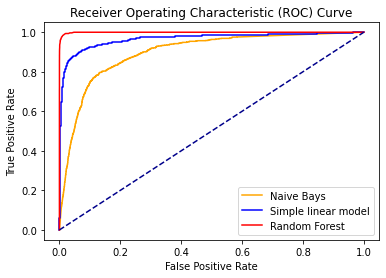

In [73]:
plt.plot(fpr_Naive, tpr_Naive, color='orange', label='Naive Bays')
plt.plot(fpr_Linear, tpr_Linear, color='blue', label='Simple linear model')
plt.plot(fpr_forest, tpr_forest, color='red', label='Random Forest')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()